req         WARNING 	DEFAULT CACHE ENABLED! (1.33 GB) C:\Users\dilau\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2022/13/results.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\dilau\Desktop\TeamProjF1\fasftF1\.venv\Lib\site-packages\urllib3\connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "c:\Users\dilau\Desktop\TeamProjF1\fasftF1\.venv\Lib\site-packages\urllib3\connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dilau\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 1428, in getresponse
    response.begin()
  File "C:\Users\dilau\AppData\Local\Programs\Pyth

The race winner is: VER


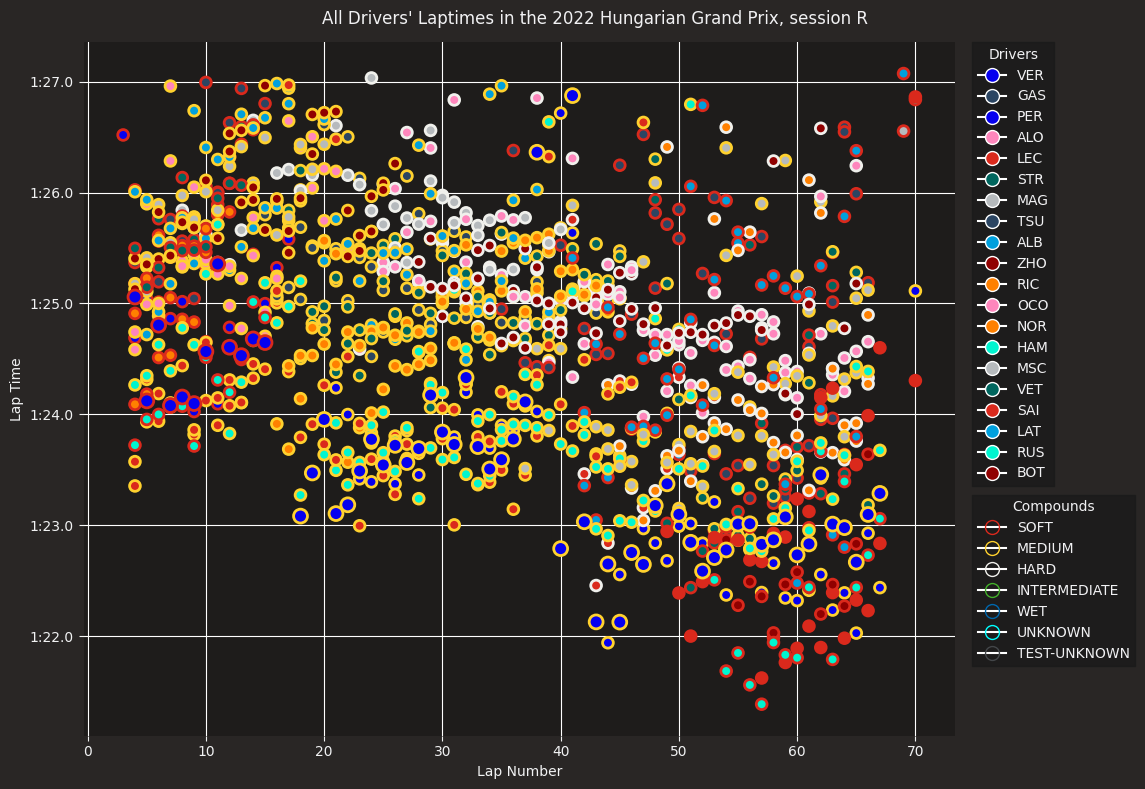

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

# Enable cache (optional)
# fastf1.Cache.enable_cache('cache')

# Set up FastF1 and Matplotlib
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False, color_scheme='fastf1')

# Define the session details
year = 2022
gran_prix = "Hungarian"
sessionG = 'R'  # Race session

# Load the session data
session = fastf1.get_session(year, gran_prix, sessionG)
session.load()

# Get the race winner (driver in position 1)
race_winner = session.results.iloc[0]["DriverNumber"]  # Get the winner's driver number
race_winner_abbreviation = session.results.iloc[0]["Abbreviation"]  # Get the winner's 3-letter abbreviation
print(f"The race winner is: {race_winner_abbreviation}")

# Get all laps from all drivers, filtering out slow laps
all_laps = session.laps.pick_quicklaps().reset_index()

# Filter laps for the race winner
winner_laps = all_laps[all_laps["Driver"] == race_winner_abbreviation]

# Remove the winner's laps from the main dataset to avoid duplication
other_laps = all_laps[all_laps["Driver"] != race_winner_abbreviation]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Get the compound color mapping
compound_colors = fastf1.plotting.get_compound_mapping(session=session)

# Use seaborn to plot lap times for all drivers except the winner
sns.scatterplot(
    data=other_laps,
    x="LapNumber",
    y="LapTime",
    ax=ax,
    hue="Driver",  # Differentiate drivers by color
    palette=fastf1.plotting.get_driver_color_mapping(session=session),  # Use FastF1's driver color mapping
    s=60,  # Marker size for other drivers
    linewidth=2,  # Add a border around the markers
    edgecolor=other_laps["Compound"].map(compound_colors),  # Border color based on compound
    legend=False  # Disable automatic legend
)

# Plot the winner's laps with a larger marker size
sns.scatterplot(
    data=winner_laps,
    x="LapNumber",
    y="LapTime",
    ax=ax,
    hue="Driver",  # Use the same color as other drivers
    palette=fastf1.plotting.get_driver_color_mapping(session=session),  # Use FastF1's driver color mapping
    s=100,  # Larger marker size for the winner
    linewidth=2,  # Add a border around the markers
    edgecolor=winner_laps["Compound"].map(compound_colors),  # Border color based on compound
    legend=False  # Disable automatic legend
)

# Create the first legend for drivers
# Extract unique drivers and their colors
unique_drivers = all_laps["Driver"].unique()
driver_colors = fastf1.plotting.get_driver_color_mapping(session=session)

# Create a list of legend handles for drivers
from matplotlib.lines import Line2D
driver_legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=driver_colors[driver], markersize=10, label=driver)
    for driver in unique_drivers
]

# Add the driver legend
driver_legend = ax.legend(
    handles=driver_legend_elements,
    title="Drivers",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),  # Position outside the plot
    borderaxespad=0.
)

# Create the second legend for compounds
# Create a proxy artist for each compound color
compound_legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='none', markeredgecolor=color, markersize=10, label=compound)
    for compound, color in compound_colors.items()
]

# Add the compound legend
compound_legend = ax.legend(
    handles=compound_legend_elements,
    title="Compounds",
    loc="lower left",
    bbox_to_anchor=(1.02, 0.1),  # Position outside the plot, below the drivers legend
    borderaxespad=0.
)

# Add the driver legend back to the plot (it gets removed when adding the second legend)
ax.add_artist(driver_legend)

# Customize the plot
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.invert_yaxis()  # Invert y-axis for better visualization of lap times
plt.suptitle(f"All Drivers' Laptimes in the {year} {gran_prix} Grand Prix, session {sessionG}")

# Add grid and improve layout
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Adjust layout to make space for the legends
plt.subplots_adjust(right=0.8)

# Show the plot
plt.show()

core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.4.4]


req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2022/13/results.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\dilau\Desktop\TeamProjF1\fasftF1\.venv\Lib\site-packages\urllib3\connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "c:\Users\dilau\Desktop\TeamProjF1\fasftF1\.venv\Lib\site-packages\urllib3\connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dilau\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 1428, in getresponse
    response.begin()
  File "C:\Users\dilau\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 331, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\

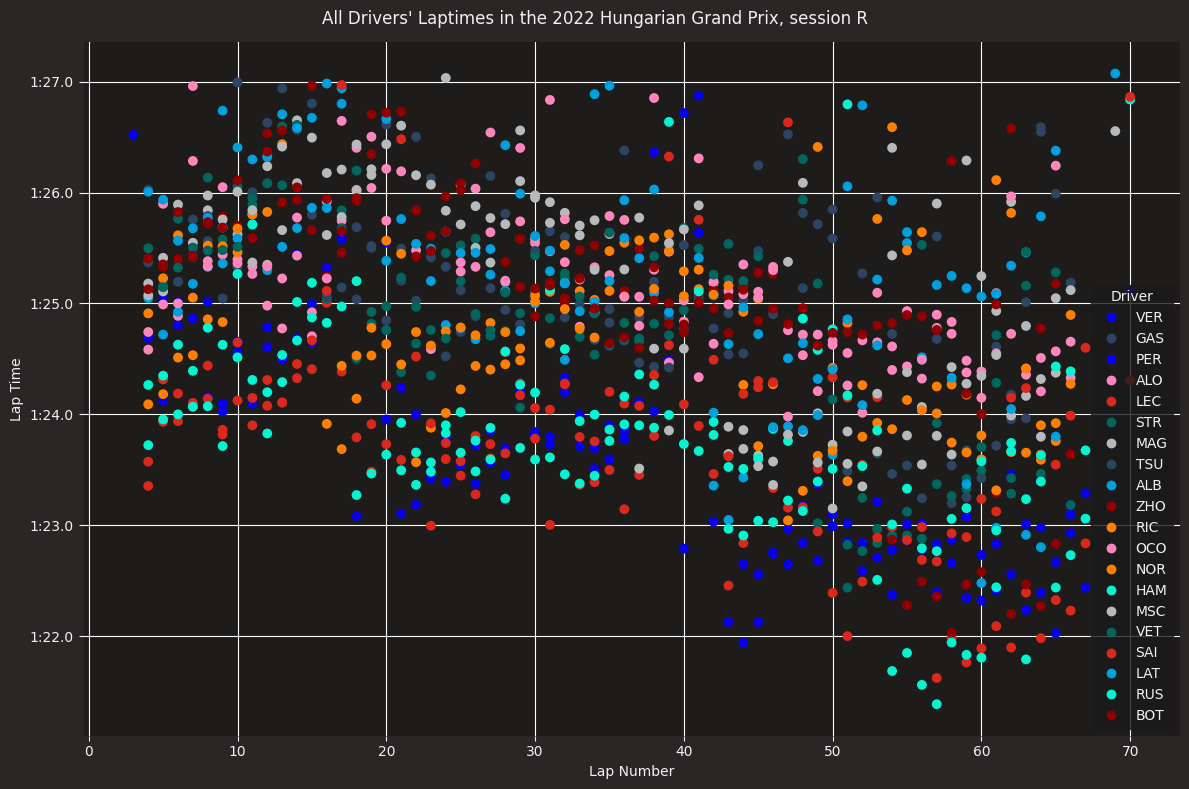

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

# Enable cache (optional)
# fastf1.Cache.enable_cache('cache')

# Set up FastF1 and Matplotlib
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False, color_scheme='fastf1')

# Define the session details
year = 2022
gran_prix = "Hungarian"
sessionG = 'R'  # Race session

# Load the session data
session = fastf1.get_session(year, gran_prix, sessionG)
session.load()

# Get all laps from all drivers, filtering out slow laps
all_laps = session.laps.pick_quicklaps().reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Use seaborn to plot lap times for all drivers
sns.scatterplot(
    data=all_laps,
    x="LapNumber",
    y="LapTime",
    ax=ax,
    hue="Driver",  # Differentiate drivers by color
    palette=fastf1.plotting.get_driver_color_mapping(session=session),  # Use FastF1's driver color mapping
    s=50,
    linewidth=0,
    legend='auto'
)

# Customize the plot
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.invert_yaxis()  # Invert y-axis for better visualization of lap times
plt.suptitle(f"All Drivers' Laptimes in the {year} {gran_prix} Grand Prix, session {sessionG}")

# Add grid and improve layout
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Show the plot
plt.show()